<h1>Lab 4 Data wrangling and EDA</h1>
Objectives : <br>
1.To provide hands-on experience in preparing and analyzing data to uncover patterns, relationships, and insights that can guide decision-making<br>
2.Clean and preprocess datasets to make them ready for analysis.

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
netflix_data = pd.read_csv('netflix_title.csv')
imdb_data = pd.read_csv('imdb_rating.csv')

In [231]:
netflix_data.drop(columns = ['show_id', 'cast', 'date_added', 'duration', 'description', 'listed_in', 'Unnamed: 0.1', 'Unnamed: 0'], inplace = True)
imdb_data = imdb_data.drop(columns = ['ONE-LINE', 'STARS', 'RunTime','Gross'])

In [232]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      8807 non-null   object
 1   title     8807 non-null   object
 2   director  6173 non-null   object
 3   country   7976 non-null   object
 4   rating    8803 non-null   object
dtypes: object(5)
memory usage: 344.2+ KB


In [233]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOVIES  9999 non-null   object 
 1   YEAR    9355 non-null   object 
 2   GENRE   9919 non-null   object 
 3   RATING  8179 non-null   float64
 4   VOTES   8179 non-null   object 
dtypes: float64(1), object(4)
memory usage: 390.7+ KB


In [234]:
imdb_data.drop_duplicates(inplace = True)

In [235]:
imdb_data.dropna(how = 'any', inplace=True)
netflix_data.dropna(how = 'any', inplace=True)

In [236]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [237]:
netflix_data.rename(columns = {'title':'Title'}, inplace = True)

In [239]:
imdb_data['MOVIES'] = imdb_data['MOVIES'].str.strip().str.upper()
netflix_data['Title'] = netflix_data['Title'].str.strip().str.upper()

In [247]:
merged_data = pd.merge(left=imdb_data, right=netflix_data, how='inner', left_on='MOVIES', right_on='Title')
merged_data.drop(columns = ['MOVIES'], inplace = True)
title = merged_data.pop('Title')
merged_data.insert(0, 'Title', title)
merged_data.drop_duplicates(inplace = True)
merged_data.head()

,Title,YEAR,GENRE,RATING,VOTES,type,director,country,rating
0,THE LAST LETTER FROM YOUR LOVER,(2021),"\nDrama, Romance",6.8,"5,283",Movie,Augustine Frizzell,United Kingdom,TV-MA
1,THE FLASH,(2014– ),"\nAction, Adventure, Drama",7.6,"320,264",TV Show,Glen Winter,United States,TV-14
2,SUPERNATURAL,(2005–2020),"\nDrama, Fantasy, Horror",8.4,"404,273",TV Show,Phil Sgriccia,"United States, Canada",TV-14
3,KINGDOM,(2019– ),"\nAction, Drama, History",8.4,"34,906",TV Show,Kim Seong-hun,"South Korea, United States",TV-MA
4,ARMY OF THE DEAD,(2021),"\nAction, Crime, Horror",5.8,"132,378",Movie,Zack Snyder,United States,R


In [248]:
merged_data.sort_values(by = ['Title', 'RATING'], ascending = [True, False], inplace = True)

In [249]:
merged_data[merged_data.duplicated(subset=['Title'], keep= 'first')].sort_values('Title')

,Title,YEAR,GENRE,RATING,VOTES,type,director,country,rating
605,BODYGUARD,(I) (2011),"\nAction, Comedy, Drama",4.7,"24,275",Movie,Siddique,India,TV-14
1470,COMEDIANS IN CARS GETTING COFFEE,(2012– ),"\nAnimation, Comedy, Family",6.4,151,TV Show,Jerry Seinfeld,United States,TV-14
1467,COMEDIANS IN CARS GETTING COFFEE,(2012– ),"\nAnimation, Comedy, Family",6.6,190,TV Show,Jerry Seinfeld,United States,TV-14
1469,COMEDIANS IN CARS GETTING COFFEE,(2012– ),"\nAnimation, Comedy, Family",6.7,171,TV Show,Jerry Seinfeld,United States,TV-14
1471,COMEDIANS IN CARS GETTING COFFEE,(2012– ),"\nAnimation, Comedy, Family",7.0,162,TV Show,Jerry Seinfeld,United States,TV-14
...,...,...,...,...,...,...,...,...,...
1488,VALERIA,(2020– ),"\nComedy, Drama, Romance",7.4,72,TV Show,Inma Torrente,Spain,TV-MA
1489,VALERIA,(2020– ),"\nComedy, Drama, Romance",7.3,62,TV Show,Inma Torrente,Spain,TV-MA
1534,VALERIA,(2020– ),"\nComedy, Drama, Romance",7.3,71,TV Show,Inma Torrente,Spain,TV-MA
1544,VALERIA,(2020– ),"\nComedy, Drama, Romance",7.2,64,TV Show,Inma Torrente,Spain,TV-MA


In [250]:
merged_data.drop_duplicates(subset=['Title'], keep= 'first', inplace = True)

In [251]:
movie_data = merged_data[merged_data['type'] == 'Movie']
show_data = merged_data[merged_data['type'] == 'TV Show']

Nayan Khusu  Roll no : 080bct048<br>
1 : Find for each year the 5 most popular shows and movies separately (i.e. use the information from ‘type’ column of netflix data to find if it is a show or a movie and rank the shows and movies separately)

In [100]:
print('Top 5 movies with highest rating : ')
movie_data.sort_values(by='RATING', ascending=False).head(5)   

Top 5 movies with highest rating : 


,Title,YEAR,GENRE,RATING,VOTES,type,director,country,rating
955,HANS ZIMMER: LIVE IN PRAGUE,(2017 TV Special),"\nDocumentary, Music",9.1,"2,472",Movie,Tim Van Someren,United Kingdom,TV-G
411,DAVID ATTENBOROUGH: A LIFE ON OUR PLANET,(2020),"\nDocumentary, Biography",9.0,"28,445",Movie,"Alastair Fothergill, Jonnie Hughes, Keith Scholey","United States, United Kingdom",PG
787,IN OUR MOTHERS' GARDENS,(2021),\nDocumentary,8.9,77,Movie,Shantrelle P. Lewis,United States,TV-MA
27,THE LORD OF THE RINGS: THE RETURN OF THE KING,(2003),"\nAction, Adventure, Drama",8.9,"1,691,777",Movie,Peter Jackson,"New Zealand, United States",PG-13
19,BO BURNHAM: INSIDE,(2021 TV Special),"\nComedy, Drama, Music",8.7,"31,108",Movie,Bo Burnham,United States,TV-MA


In [102]:
print('Top 5 TV shows with highest rating : ')
show_data.sort_values(by='RATING', ascending=False).head(5)

Top 5 TV shows with highest rating : 


,Title,YEAR,GENRE,RATING,VOTES,type,director,country,rating
1486,JULIE AND THE PHANTOMS,(2020– ),"\nComedy, Drama, Family",9.4,489,TV Show,Kenny Ortega,United States,TV-G
1547,MIDDLEDITCH & SCHWARTZ,(2020– ),\nComedy,9.1,513,TV Show,Ryan Polito,United States,TV-MA
531,FROZEN PLANET,(2011–2012),\nDocumentary,9.0,"27,986",TV Show,Alastair Fothergill,"United Kingdom, United States, Spain, Germany,...",TV-PG
1110,DAVE CHAPPELLE,(2017),"\nDocumentary, Comedy",8.7,"2,224",TV Show,Stan Lathan,United States,TV-MA
1443,THE FLASH,(2014– ),"\nAction, Adventure, Drama",8.7,"2,085",TV Show,Glen Winter,United States,TV-14


2 : Find what genre of movies are most popular (top 10) and show in a bar graph.

In [103]:
movie_data['GENRE'].unique()

array(['\nDrama, History            ', '\nDocumentary            ',
       '\nComedy, Drama, Romance            ',
       '\nDrama, Romance            ', '\nDrama, Family            ',
       '\nAdventure, Comedy, Romance            ',
       '\nDocumentary, Crime, History            ', '\nDrama            ',
       '\nHorror, Mystery, Romance            ',
       '\nCrime, Drama, Horror            ',
       '\nCrime, Drama, History            ', '\nHorror            ',
       '\nComedy            ', '\nAction, Drama, History            ',
       '\nAction, Thriller            ',
       '\nDocumentary, Short            ',
       '\nComedy, Family, Fantasy            ',
       '\nComedy, Family, Romance            ',
       '\nFamily, Romance            ',
       '\nDrama, Horror, Mystery            ',
       '\nDrama, Fantasy, Thriller            ',
       '\nComedy, Family            ', '\nBiography, Comedy            ',
       '\nAnimation, Short, Family            ',
       '\nDocum

In [106]:
genre_data_cleaned = imdb_data['GENRE'].str.strip().str.replace(r'\n', '', regex=True)
genre_data_cleaned = genre_data_cleaned.str.split(',')


In [129]:
list_of_genres = flatten_serieslist(genre_data_cleaned)
list_of_genres = pd.Series(list_of_genres).str.strip().str.upper()
list_of_genres.unique()

array(['ACTION', 'HORROR', 'THRILLER', 'ANIMATION', 'ADVENTURE', 'DRAMA',
       'COMEDY', 'CRIME', 'ROMANCE', 'MYSTERY', 'FANTASY', 'HISTORY',
       'SCI-FI', 'BIOGRAPHY', 'FAMILY', 'DOCUMENTARY', 'MUSIC', 'SPORT',
       'SHORT', 'GAME-SHOW', 'REALITY-TV', 'MUSICAL', 'WAR', 'WESTERN',
       'FILM-NOIR', 'TALK-SHOW', 'NEWS'], dtype=object)

In [157]:
from collections import Counter

def flatten_serieslist(series):
    return [element for sublist in series for element in sublist]

def get_value_counts(data_list : list):
    value_counts = Counter(data_list)
    return (value_counts)

def plot_bargraph(categories : list, values: list, xlabel, ylabel, title):
    plt.figure(figsize=(15, 6))
    plt.bar(categories, values, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Nayan Khusu 080BCT048  \n {title}')
    plt.show()

In [ ]:
genres = get_value_counts(list_of_genres)
top_genres = genres.most_common(10) 
top_10_genres = [genre for genre, count in top_genres]
top_10_counts = [count for genre, count in top_genres]



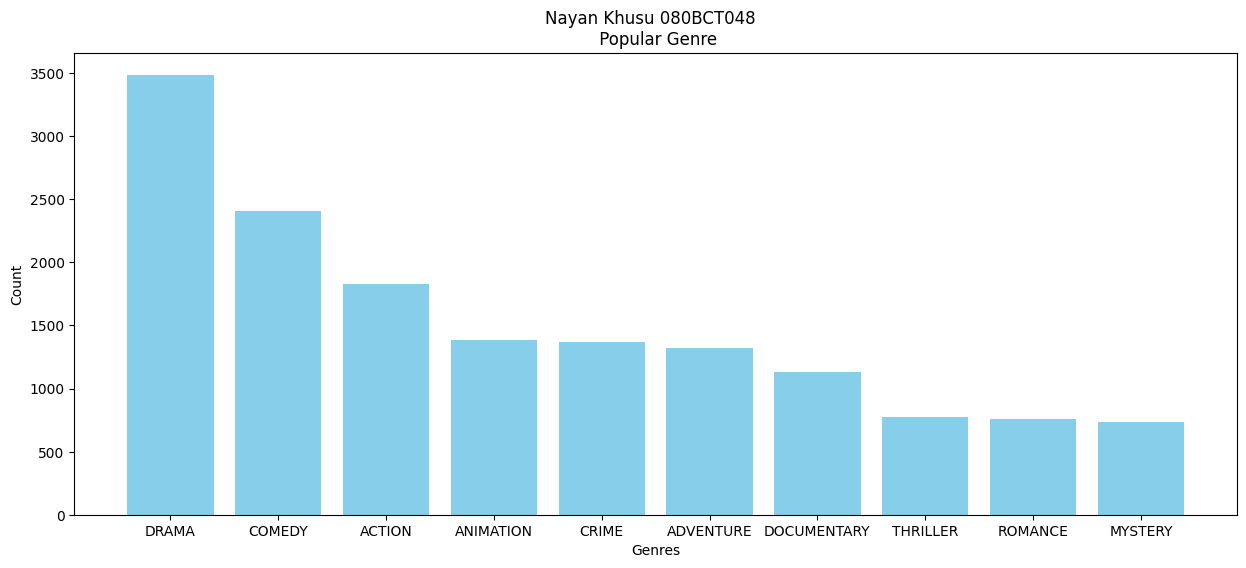

In [158]:
plot_bargraph(categories=top_10_genres, values=top_10_counts, title='Popular Genre', xlabel='Genres', ylabel='Count')

3 : Plot the distribution of values of ‘RATING’ column of imdb dataset using histogram plot and in a box plot. Also identify outlier values using the box plot

Text(0, 0.5, 'Frequency')

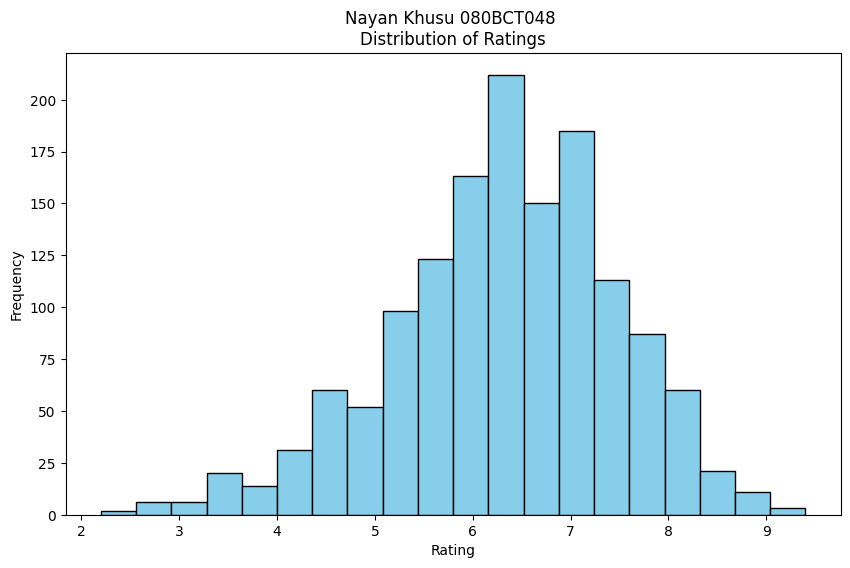

In [161]:
plt.figure(figsize=(10, 6))
plt.hist(merged_data['RATING'], bins=20, color='skyblue', edgecolor='black')
plt.title('Nayan Khusu 080BCT048 \nDistribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

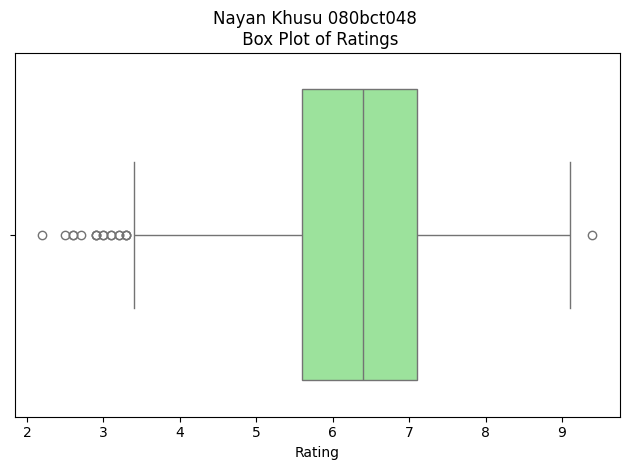

In [ ]:
sns.boxplot(data=merged_data, x='RATING', color='lightgreen')
plt.title('Nayan Khusu 080bct048 \n Box Plot of Ratings')
plt.xlabel('Rating')
plt.tight_layout() 
plt.show()

4 : Explore which country produces the most shows and movies (separately) and how popular they are (find the rating of top movies and shows for the country producing most shows and movies)

In [272]:
merged_data['country'] = merged_data['country'].str.split(',')
merged_data['GENRE'] = merged_data['GENRE'].str.split(',')

In [184]:
merged_data_country = merged_data.explode('country')
merged_data_country['country'] = merged_data_country['country'].str.strip().str.upper()
merged_data_country['country'].unique()

array(['ITALY', 'CANADA', 'UNITED STATES', 'NIGERIA', 'SOUTH AFRICA',
       'INDIA', 'MEXICO', 'NORWAY', 'ICELAND', 'SINGAPORE', 'GERMANY',
       'NEW ZEALAND', 'UNITED KINGDOM', 'SPAIN', 'INDONESIA', 'FRANCE',
       'BELGIUM', 'IRELAND', 'ARGENTINA', 'AUSTRALIA', 'MALAYSIA',
       'JAPAN', 'PHILIPPINES', 'DENMARK', 'CHINA', 'SOUTH KOREA',
       'BRAZIL', 'COLOMBIA', 'ROMANIA', 'SWITZERLAND', 'SWEDEN',
       'NETHERLANDS', 'GHANA', 'POLAND', 'UNITED ARAB EMIRATES', 'TURKEY',
       'QATAR', 'ISRAEL', 'BULGARIA', 'CAYMAN ISLANDS', 'TAIWAN', '',
       'HUNGARY', 'THAILAND', 'CZECH REPUBLIC', 'RUSSIA', 'SERBIA',
       'CHILE', 'PAKISTAN', 'VENEZUELA', 'CAMBODIA', 'GREECE', 'VIETNAM',
       'PORTUGAL', 'AUSTRIA', 'MAURITIUS', 'JORDAN', 'EGYPT', 'HONG KONG',
       'BERMUDA', 'ECUADOR', 'MOROCCO', 'URUGUAY', 'LUXEMBOURG', 'ANGOLA',
       'SAUDI ARABIA', 'KAZAKHSTAN', 'MALAWI', 'CAMEROON', 'IRAN',
       'PANAMA', 'LEBANON', 'EAST GERMANY', 'WEST GERMANY', 'UKRAINE'],
      dtype=o

In [185]:
movie_data_country = merged_data_country[merged_data_country['type'] == 'Movie']
show_data_country = merged_data_country[merged_data_country['type'] == 'TV Show']

In [187]:
most_movie_country = movie_data_country['country'].value_counts().idxmax()
most_show_country = show_data_country['country'].value_counts().idxmax()

In [191]:
print(f'Most number of movies are produced in {most_movie_country}')
print(f'Most number of TV shows are produced in {most_show_country}')

Most number of movies are produced in UNITED STATES
Most number of TV shows are produced in UNITED STATES


In [192]:
print('Top movies by that country : ')
movie_data_country[movie_data_country['country'] == most_movie_country].sort_values('RATING', ascending=False).head(5)

Top movies by that country : 


,Title,YEAR,GENRE,RATING,VOTES,type,director,country,rating
411,DAVID ATTENBOROUGH: A LIFE ON OUR PLANET,(2020),"\nDocumentary, Biography",9.0,"28,445",Movie,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",UNITED STATES,PG
27,THE LORD OF THE RINGS: THE RETURN OF THE KING,(2003),"\nAction, Adventure, Drama",8.9,"1,691,777",Movie,Peter Jackson,UNITED STATES,PG-13
787,IN OUR MOTHERS' GARDENS,(2021),\nDocumentary,8.9,77,Movie,Shantrelle P. Lewis,UNITED STATES,TV-MA
19,BO BURNHAM: INSIDE,(2021 TV Special),"\nComedy, Drama, Music",8.7,"31,108",Movie,Bo Burnham,UNITED STATES,TV-MA
41,THE LORD OF THE RINGS: THE TWO TOWERS,(2002),"\nAction, Adventure, Drama",8.7,"1,529,752",Movie,Peter Jackson,UNITED STATES,PG-13


In [193]:
print('Top TV shows by that country : ')
show_data_country[show_data_country['country'] == most_show_country].sort_values('RATING', ascending=False).head(5)

Top TV shows by that country : 


,Title,YEAR,GENRE,RATING,VOTES,type,director,country,rating
1486,JULIE AND THE PHANTOMS,(2020– ),"\nComedy, Drama, Family",9.4,489,TV Show,Kenny Ortega,UNITED STATES,TV-G
1547,MIDDLEDITCH & SCHWARTZ,(2020– ),\nComedy,9.1,513,TV Show,Ryan Polito,UNITED STATES,TV-MA
531,FROZEN PLANET,(2011–2012),\nDocumentary,9.0,"27,986",TV Show,Alastair Fothergill,UNITED STATES,TV-PG
1110,DAVE CHAPPELLE,(2017),"\nDocumentary, Comedy",8.7,"2,224",TV Show,Stan Lathan,UNITED STATES,TV-MA
1443,THE FLASH,(2014– ),"\nAction, Adventure, Drama",8.7,"2,085",TV Show,Glen Winter,UNITED STATES,TV-14


5 : Shows/Movies by which director is popular (Find top 10 directors) and all genres for the movies or shows that they made.

In [252]:
merged_data['director'] = merged_data['director'].str.split(',')
merged_data_director = merged_data.explode('director')
director_ratings = merged_data_director.groupby(by = 'director')['RATING'].mean()

In [261]:
director_ratings = director_ratings.sort_values(ascending=False)

In [244]:
top_directors = director_ratings.head(10)

In [258]:
print('Top 10 directors with highest average rating : ')
top_directors

Top 10 directors with highest average rating : 


director
Kenny Ortega           9.4
Tim Van Someren        9.1
 Keith Scholey         9.0
 Jonnie Hughes         9.0
Alastair Fothergill    9.0
Shantrelle P. Lewis    8.9
Peter Jackson          8.8
 Gary Howsam           8.7
Jesse Warn             8.7
Norm Hiscock           8.7
Name: RATING, dtype: float64

In [259]:
director_genres = {}
for director in top_directors.index:
    director_data = merged_data_director[merged_data_director['director'] == director]
    all_genres = [genre for sublist in director_data['GENRE'] for genre in sublist]
    unique_genres = set(all_genres)
    director_genres[director] = unique_genres

Find the most occurring user viewership category (i.e. ‘rating’ column of the imdb dataset) for the 100 highest voted movies/shows of each year and for each top 10 countries (top countries based on number of shows produced).

In [294]:
merged_data["Year Released"] = merged_data["YEAR"].str.split("–").str[0].replace(r'[^\d]', '', regex=True).astype(int)
merged_data_exploded = merged_data.explode('country')

In [296]:
top_per_year = merged_data_exploded.sort_values(by=['Year Released', 'RATING'], ascending=[True, False]).groupby('Year Released')

In [297]:
top_countries = merged_data_exploded['country'].value_counts().head(10)

In [310]:
rating_analysis = {}

for country in top_countries.index:
    country_data = merged_data_exploded[merged_data_exploded['country'] == country]
    for year in country_data['Year Released'].unique():
        year_country_data = country_data[(country_data['Year Released'] == year)]
        most_common_rating = year_country_data['rating'].mode()[0]
        rating_analysis[(year, country)] = most_common_rating

for (year, country), rating in rating_analysis.items():
    print(f"Year: {year}, Country: {country}, Most Common Rating: {rating}")

Year: 2017, Country: United States, Most Common Rating: TV-MA
Year: 2016, Country: United States, Most Common Rating: TV-MA
Year: 2014, Country: United States, Most Common Rating: TV-MA
Year: 2018, Country: United States, Most Common Rating: TV-MA
Year: 2019, Country: United States, Most Common Rating: TV-MA
Year: 2015, Country: United States, Most Common Rating: TV-MA
Year: 2020, Country: United States, Most Common Rating: TV-MA
Year: 2004, Country: United States, Most Common Rating: PG
Year: 2012, Country: United States, Most Common Rating: TV-MA
Year: 2002, Country: United States, Most Common Rating: PG
Year: 2021, Country: United States, Most Common Rating: TV-MA
Year: 2000, Country: United States, Most Common Rating: R
Year: 2013, Country: United States, Most Common Rating: TV-MA
Year: 2011, Country: United States, Most Common Rating: PG
Year: 1989, Country: United States, Most Common Rating: TV-MA
Year: 2009, Country: United States, Most Common Rating: R
Year: 1978, Country: Unit